# import necessary libraries

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from  scipy.spatial.distance import cosine, correlation
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [30]:
df = pd.read_csv('book.csv',encoding='latin1')
df = df.iloc[:,1:]
df.head()
df = df.rename(columns = {'User.ID': 'user_id', 'Book.Title':'book_title','Book.Rating':'book_rating'})
df

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [31]:
df.shape

(10000, 3)

In [26]:
# plotting 

C:\Users\Rohith Challam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


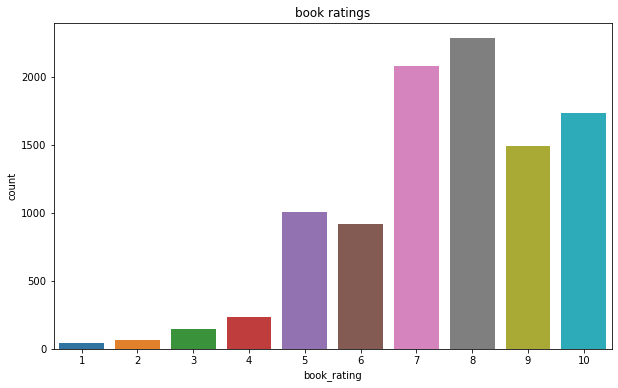

In [32]:
fig, ax = plot.subplots(figsize = (10, 6))
sns.countplot(df['book_rating'], data = books)
ax.set_title('book ratings')
plot.show() 
# most of the books recieved rating as 8 

In [ ]:
# find length of unique values

In [ ]:
len(df['user_id'].unique())

In [ ]:
len(df['book_title'].unique())

In [ ]:
# splitting the dataset using pivot

In [ ]:
books = df.pivot_table(index='user_id',columns='book_title',values='book_rating').reset_index(drop=True)
books

In [ ]:
books.fillna(0,inplace=True)
books

In [ ]:
# calculating cosine similarity
books_similar = pd.DataFrame(1 - pairwise_distances(books.values, metric='cosine'))
books_similar

In [ ]:
books_similar.index = df.user_id.unique()
books_similar.columns = df.user_id.unique()
books_similar

In [ ]:
np.fill_diagonal(books_similar.values,0)
books_similar

In [38]:
similarity = books_similar.idxmax(axis=1)
similarity

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [52]:
books[(df['user_id']==276726) | (df['user_id']==276729)]

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_17644\2394665484.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  books[(df['user_id']==276726) | (df['user_id']==276729)]


book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,30: Pieces of a Novel,365 Easy Low-Calorie Recipes,365 Health and Happiness Boosters,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)","5 Novels : Alan Mendelsohn, the Boy from Mars; Slaves of Spiegel; The Last Guru; Young Adult Novel; The Snarkout Boys and the Avocado of Death",50 Simple Things You Can Do to Save the Earth,500 palabras nuevas para ti / 500 Words To Grow On,66 Laps: A Novel,7b,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,8 Weeks to Optimum Health,97 Ways to Make A Baby Laugh,99 francs: Roman,A 3rd Serving of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,A 6th Bowl of Chicken Soup for the Soul (Chicken Soup for the Soul),"A BEAUTIFUL MIND: A Biography of John Forbes Nash, Jr., Winner of the Nobel Prize in Economics, 1994","A Baby For Lord Roderick (Royal Flash) (Harlequin American Romance, No. 926)",A Basic Guide to Archery (An Official U.S. Olympic Committee Sports Series),"A Beautiful Mind : A Biography of John Forbes Nash, Jr.",A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Big New Free Happy Unusual Life: Self-Expression and Spiritual Practice for Those Who Have Time for Neither,A Bigamist's Daughter,A Blip in the Continuum (Macintosh Version),A Bloody Field by Shrewsbury,A Book of Blessings,A Boy Named Phyllis: A Suburban Memoir,A Break with Charity: A Story about the Salem Witch Trials,A Bridge to Wiseman's Cove (Uqp Young Adult Fiction),A Brief History of Qi,A Brief History of Time : The Updated and Expanded Tenth Anniversary Edition,A Burning Obsession (Blaze),A Cabinet of Medical Curiosities,"A Call to Conscience : The Landmark Speeches of Dr. Martin Luther King, Jr.",A Careful Wife,A Caribbean Mystery,A Case of Conscience (Del Rey Impact),A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback)),A Certain Justice: A Novel,"A Chakra &amp; Kundalini Workbook: Psycho-Spiritual Techniques for Health, Rejuvenation, Psychic Powers and Spiritual Realization",A Charles Williams Reader,A Child Called \It\: One Child's Courage to Survive,A Child's Called It and The Lost Boy,A Child's Night Dream,A Christmas Carol (Great Stories),A Christmas Carol (Scholastic Classics),A Christmas Story,A Christmas Story : The Book That Inspired the Hilarious Classic Film,A Circle of Silver (Circle of Silver Chronicles),A City in Winter,A Civil Action,"A Clash of Kings (A Song of Fire and Ice, Boo

In [47]:
p_1=df[df['user_id']==276726]
p_1.book_title

0    Classical Mythology
Name: book_title, dtype: object

In [50]:
p_2=df[df['user_id']==276729]
p_2.book_title

1            Clara Callan
2    Decision in Normandy
Name: book_title, dtype: object

In [51]:
# now merge these two similar
pd.merge(p_1,p_2,on='book_title',how='outer')

,user_id_x,book_title,book_rating_x,user_id_y,book_rating_y
0,276726.0,Classical Mythology,5.0,NaN,NaN
1,NaN,Clara Callan,NaN,276729.0,3.0
2,NaN,Decision in Normandy,NaN,276729.0,6.0
